<div class="alert alert-block alert-success">
    
# Mihaela Zaharieva

</div>

<div class="alert alert-block alert-info">

## Overview
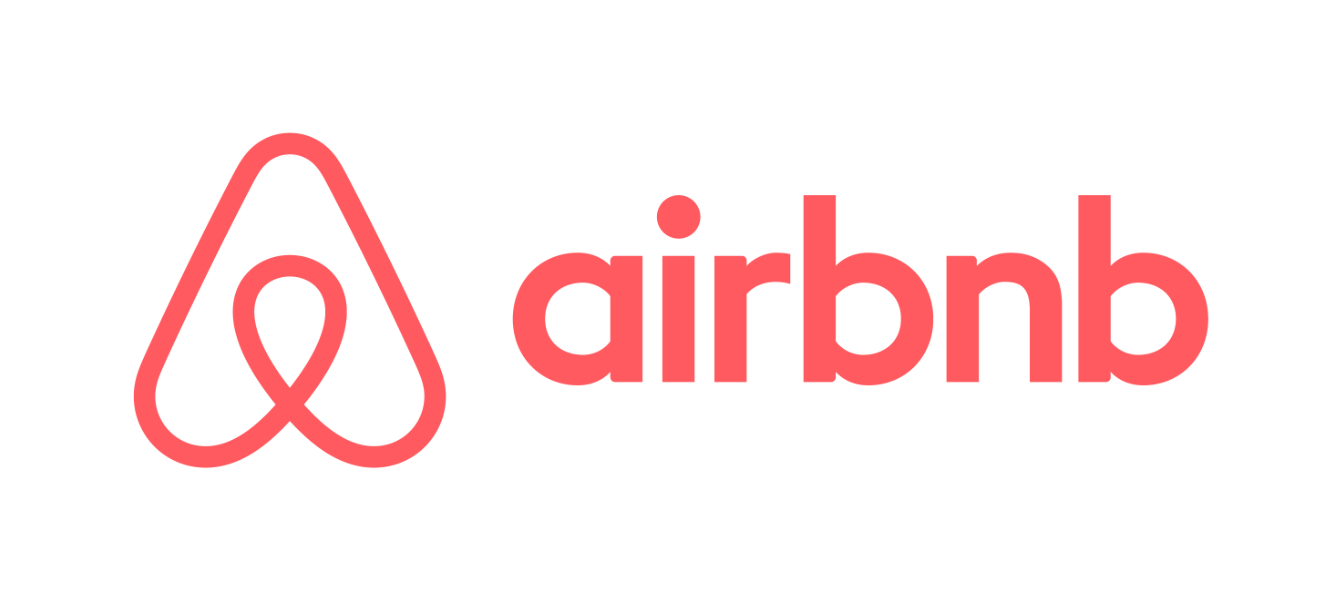
    
Airbnb is a two sided marketplace which matches guests to hosts. The booking flow at Airbnb is as follows: a guest
finds an available room (listing) that they like, and then they contact the host. Once the guest finds a listing they
are interested in, there are three ways to send the host an inquiry: ‘contact_me’, ‘book_it’, or ‘instant_book’
(detailed at the bottom of this document). Upon receiving the inquiry, the host can then decide whether or not to
accept the request (for ‘contact_me’ and ‘book_it’ methods -- instant_book is auto-accepted). One of our goals at
Airbnb is to increase bookings on our platform.
    
You are the first data scientist to join a cross-functional Product and Operations team working to grow bookings in
Rio de Janeiro. The team asks you for help with the following:

1. What key metrics would you propose to monitor over time the success of the team's efforts in improving
the guest host matching process and why? Clearly define your metric(s) and explain how each is
computed.
2. What areas should we invest in to increase the number of successful bookings in Rio de Janeiro? What
segments are doing well and what could be improved? Propose 2-3 specific recommendations (business
initiatives and product changes) that could address these opportunities. Demonstrate rationale behind
each recommendation AND prioritize your recommendations in order of their estimated impact.
3. There is also interest from executives at Airbnb about the work you are doing, and a desire to understand
the broader framing of the challenge of matching supply and demand, thinking beyond the data provided.
What other research, experiments, or approaches could help the company get more clarity on the
problem?

Your assignment: Summarize your recommendations in response to the questions above in a 5-8 slide
presentation intended for the Head of Product and VP of Operations (who is not technical). Include an organized
appendix sharing the details of your work conducted for the Rio team, that would be useful for the data team to
understand your work.
    
    

**[Read more here](https://drive.google.com/file/d/1qJPv9iNgjDiUeLsPvWK1eYXOWdYpYqC4/view?usp=sharing)**


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data 

**Please run the below code to ensure that you are able to load the data. We will be using three datasets**

* `Listings`
* `users`
* `contacts`

In [138]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/' 

listings = pd.read_csv(url + "aibnb_listings.csv")

users = pd.read_csv(url + "airbnb_users.csv")

In [139]:
date_list = ['ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first','ts_booking_at','ds_checkin_first', 'ds_checkout_first' ]

contacts = pd.read_csv(url + "airbnb_contacts.csv", parse_dates = date_list)

## Your Analysis below 👨🏻‍💻

In [140]:
contacts.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40,2016-05-05 15:17:40,NaT,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26,2016-06-23 03:09:33,2016-06-23 03:09:33,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker


In [141]:
listings.head()

,id_listing_anon,room_type,listing_neighborhood,total_reviews
0,71582793-e5f8-46d7-afdf-7a31d2341c79,Private room,-unknown-,0.0
1,a1a3f728-e21f-4432-96aa-361d28e2b319,Entire home/apt,Copacabana,0.0
2,353a68be-ecf9-4b7b-9533-c882dc2f0760,Entire home/apt,Barra da Tijuca,3.0
3,b9ae1908-0486-40ac-bbcf-bd63ffebfe63,Entire home/apt,Lapa,4.0
4,fa0290ef-7881-4482-8981-8ebb1ce5dbfd,Entire home/apt,-unknown-,0.0


In [142]:
users.head()

,id_user_anon,country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0
3,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98


In [143]:
#Data Cleaning and Preping: Investigate null values and combine the data frames that will be useful for my analysis and indetifying the key metrics

In [144]:
#Look at a summary of the dataframes 

In [145]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_guest_anon                         27887 non-null  object        
 1   id_host_anon                          27887 non-null  object        
 2   id_listing_anon                       27887 non-null  object        
 3   ts_interaction_first                  27887 non-null  object        
 4   ts_reply_at_first                     25855 non-null  datetime64[ns]
 5   ts_accepted_at_first                  16415 non-null  datetime64[ns]
 6   ts_booking_at                         11587 non-null  datetime64[ns]
 7   ds_checkin_first                      27887 non-null  datetime64[ns]
 8   ds_checkout_first                     27887 non-null  datetime64[ns]
 9   m_guests                              27886 non-null  float64       
 10

In [146]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13038 entries, 0 to 13037
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_listing_anon       13038 non-null  object 
 1   room_type             13038 non-null  object 
 2   listing_neighborhood  13038 non-null  object 
 3   total_reviews         13038 non-null  float64
dtypes: float64(1), object(3)
memory usage: 407.6+ KB


In [147]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31525 entries, 0 to 31524
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_user_anon           31525 non-null  object
 1   country                31524 non-null  object
 2   words_in_user_profile  31525 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 739.0+ KB


In [148]:
#merge contacts and listing into one dataframe for easier analysis rather than having separate data frames 

In [149]:
airbnb_df = contacts.merge(listings, on='id_listing_anon', how='outer')

In [150]:
airbnb_df.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,30.0,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54,2016-05-16 01:42:54,NaT,2016-07-11,2016-07-25,2.0,6.0,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,2.0,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,3.0,164.0,contact_me,new,Private room,Vidigal,49.0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10,NaT,NaT,2016-06-11,2016-06-17,1.0,14.0,1478.0,contact_me,past_booker,Private room,Vidigal,49.0


In [151]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28106 entries, 0 to 28105
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_guest_anon                         27887 non-null  object        
 1   id_host_anon                          27887 non-null  object        
 2   id_listing_anon                       28106 non-null  object        
 3   ts_interaction_first                  27887 non-null  object        
 4   ts_reply_at_first                     25855 non-null  datetime64[ns]
 5   ts_accepted_at_first                  16415 non-null  datetime64[ns]
 6   ts_booking_at                         11587 non-null  datetime64[ns]
 7   ds_checkin_first                      27887 non-null  datetime64[ns]
 8   ds_checkout_first                     27887 non-null  datetime64[ns]
 9   m_guests                              27886 non-null  float64       
 10

In [152]:
#Handling null values

In [153]:
#Step 1: Investigate null values

In [154]:
null_counts = airbnb_df.isnull().sum()
print(null_counts)

id_guest_anon                             219
id_host_anon                              219
id_listing_anon                             0
ts_interaction_first                      219
ts_reply_at_first                        2251
ts_accepted_at_first                    11691
ts_booking_at                           16519
ds_checkin_first                          219
ds_checkout_first                         219
m_guests                                  220
m_interactions                            219
m_first_message_length_in_characters      219
contact_channel_first                     219
guest_user_stage_first                    219
room_type                                   0
listing_neighborhood                        0
total_reviews                               0
dtype: int64


In [155]:
#Step 2 handle the null values

In [156]:
#After investigating it seems that 219 rows of missing data is due to the fact that the listings and the contacts data was merged.
#I have dropped all those 219 missing values as they would not have an impact on the analysis
#I looped through the aribnb_df and dropped the rows to implement the changes within the same dataframe rather than creating a new dataframe with the dropped rows

In [157]:
for i in airbnb_df.index:
    if pd.isnull(airbnb_df.loc[i, 'ds_checkin_first']) and \
       pd.isnull(airbnb_df.loc[i, 'ds_checkout_first']) and \
       pd.isnull(airbnb_df.loc[i, 'm_guests']) and \
       pd.isnull(airbnb_df.loc[i, 'm_interactions']) and \
       pd.isnull(airbnb_df.loc[i, 'm_first_message_length_in_characters']) and \
       pd.isnull(airbnb_df.loc[i, 'contact_channel_first']) and \
       pd.isnull(airbnb_df.loc[i, 'guest_user_stage_first']):
        airbnb_df.drop(i, inplace=True)
airbnb_df.reset_index(drop=True, inplace=True)

In [158]:
#certain columns are crucial to the analysis and we should not be filling them in, such as ts_interaction_first, ts_accepted_at_first, ts_booking_at,ts_reply_at_first.

In [159]:
#create new binary indicator columns
#1.booking_completed, 0 when there is a null value in ts_booking_at and 1 when there is a date value in ts_booking_at
#2.host_replied, 0 when there is a null value in ts_reply_at_first  and 1 when there is a date value in ts_reply_at_first 
#3.host_accepted, 0 when there is a null value in ts_accepted_at_first and 1 when there is a date value in ts_accepted_at_first 
#4.interaction_occured, 0 when there is a null value in ts_interaction_first and 1 where is a a date vale in ts_interaction_first

In [160]:
airbnb_df['booking_completed'] = airbnb_df['ts_booking_at'].notnull().astype(int)

In [161]:
airbnb_df['host_replied'] = airbnb_df['ts_reply_at_first'].notnull().astype(int)

In [162]:
airbnb_df['host_accepted'] = airbnb_df['ts_accepted_at_first'].notnull().astype(int)

In [163]:
airbnb_df['interaction_occurred'] = airbnb_df['ts_interaction_first'].notnull().astype(int)

In [164]:
null_counts = airbnb_df.isnull().sum()
print(null_counts)

id_guest_anon                               0
id_host_anon                                0
id_listing_anon                             0
ts_interaction_first                        0
ts_reply_at_first                        2032
ts_accepted_at_first                    11472
ts_booking_at                           16300
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    1
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel_first                       0
guest_user_stage_first                      0
room_type                                   0
listing_neighborhood                        0
total_reviews                               0
booking_completed                           0
host_replied                                0
host_accepted                               0
interaction_occurred                        0
dtype: int64


In [165]:
#the only null value left to handle is one value for m_guests, the way I will handle this is input a 0 as I don't want to loose any data for the analysis I will not be deleting the row

In [166]:
airbnb_df['m_guests'].fillna(0, inplace=True)

In [167]:
null_counts = airbnb_df.isnull().sum()
print(null_counts)

id_guest_anon                               0
id_host_anon                                0
id_listing_anon                             0
ts_interaction_first                        0
ts_reply_at_first                        2032
ts_accepted_at_first                    11472
ts_booking_at                           16300
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    0
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel_first                       0
guest_user_stage_first                      0
room_type                                   0
listing_neighborhood                        0
total_reviews                               0
booking_completed                           0
host_replied                                0
host_accepted                               0
interaction_occurred                        0
dtype: int64


In [168]:
#Check for duplicates in the dataframe

In [169]:
duplicate_rows = airbnb_df.duplicated()
num_duplicates = duplicate_rows.sum()
print(num_duplicates)

0


In [170]:
#this now concludes the Data Cleaning and Prepping

## Hypothesis

In [171]:
#Problem Statement: Increasing bookings on Airbnb in Rio de Janeiro.

In [172]:
airbnb_df.head(100)

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,booking_completed,host_replied,host_accepted,interaction_occurred
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,...,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,1,1,1,1
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54,2016-05-16 01:42:54,NaT,2016-07-11,2016-07-25,2.0,...,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,0,1,1,1
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,...,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,0,1,0,1
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,...,164.0,contact_me,new,Private room,Vidigal,49.0,0,1,0,1
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10,NaT,NaT,2016-06-11,2016-06-17,1.0,...,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5058c89a-6760-4dec-bc69-9564063cfddb,9d5ace53-9b2f-4d43-b427-67709ddff54f,458f81ae-c975-4a24-b8ac-30815cc151a2,2016-03-20 16:05:17,2016-03-20 18:26:02,NaT,NaT,2016-03-22,2016-03-25,1.0,...,499.0,book_it,new,Private room,Copacabana,14.0,0,1,0,1
96,c02a982b-9f8f-4154-9959-f031d9e43b81,9d5ace53-9b2f-4d43-b427-67709ddff54f,458f81ae-c975-4a24-b8ac-30815cc151a2,2016-03-25 21:35:49,2016-03-25 22:05:12,NaT,NaT,2016-04-01,2016-04-02,1.0,...,170.0,book_it,past_booker,Private room,Copacabana,14.0,0,1,0,1
97,39a03eb0-2988-4e2e-bf2f-6b40573be5e4,784b3a23-95d1-4e8a-9c88-bd57030ddf23,36207376-648c-41db-9ecf-a176e761f922,2016-01-04 13:28:55.0,2016-01-04 14:42:27,2016-01-04 14:42:27,2016-01-04 14:42:27,2016-01-05,2016-01-07,1.0,...,41.0,instant_book,new,Entire home/apt,Lapa,21.0,1,1,1,1
98,e5005661-9acd-410e-94be-b42cb265e33d,784b3a23-95d1-4e8a-9c88-bd57030ddf23,36207376-648c-41db-9ecf-a176e761f922,2016-01-02 23:23:00.0,2016-01-02 23:23:00,2016-01-02 23:23:00,2016-01-02 23:23:00,2016-01-04,2016-01-09,2.0,...,162.0,instant_book,past_booker,Entire home/apt,Lapa,21.0,1,1,1,1


In [173]:
# 1: Effectiveness of Contact Channels
# Here I will be calculating the bookings completed bookings by contact channel (contact_channel_first).

In [174]:
# 2: Impact of Number of Interactions between Host and Guest
# Here I will be examining the impact of interactions between hosts and guests on booking success
# Specifically targetting m-interactions

In [175]:
# 3: Influence of Guest Type and Number of Guests on Booking Decisions
# Here I will be investigating how the guest type and the number of guests impact booking decisions by the host
# Specifically targetting the guest_user_stage_first and m_guests

In [176]:
# My 3 Hypothesis 
# 1.Different contact channels (Instant Book, Book It, Contact Me) have varying impacts on booking success rates, with Instant Book expected to have the highest success rate.
# 2.The number of interactions between hosts and guests influence booking rates.
# 3.Booking acceptance rates are influenced by whether the guest is a past user and the number of guests specified in the booking request.

## Data Analysis

In [177]:
# Exploratory Analysis

In [185]:
# Hyphothesis 1:I will need to calculate the total bookings and the bookings completed and then I will plot those onto a bar chart looking at the contact channel 

In [186]:
total_bookings = airbnb_df.groupby('contact_channel_first')['booking_completed'].count().reset_index()
bookings_completed = airbnb_df.groupby('contact_channel_first')['booking_completed'].sum().reset_index()

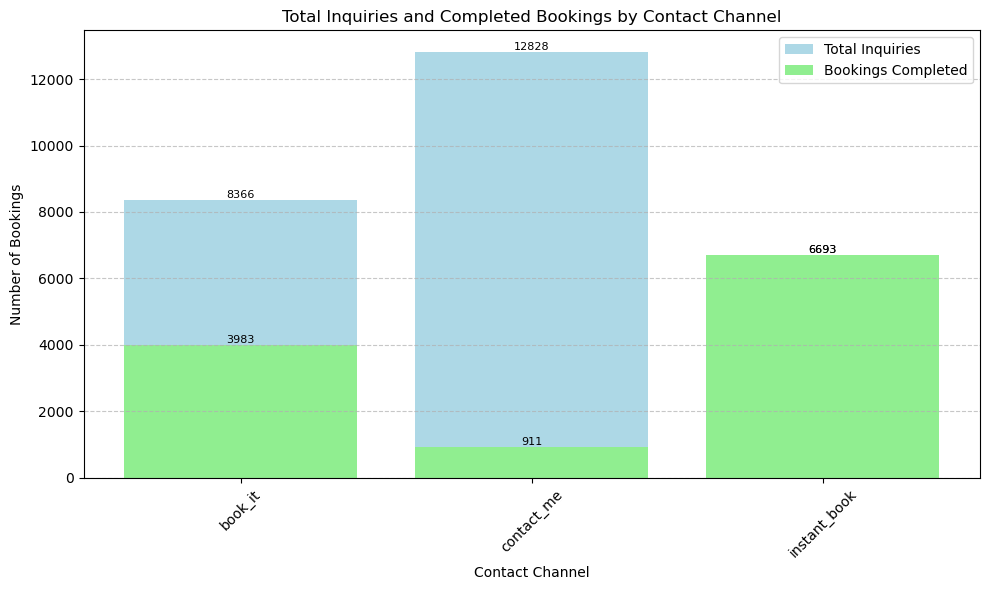

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(total_bookings['contact_channel_first'], total_bookings['booking_completed'], color='lightblue', label='Total Inquiries')
plt.bar(bookings_completed['contact_channel_first'], bookings_completed['booking_completed'], color='lightgreen', label='Bookings Completed')

plt.xlabel('Contact Channel')
plt.ylabel('Number of Bookings')
plt.title('Total Inquiries and Completed Bookings by Contact Channel')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
bar1 = plt.bar(total_bookings['contact_channel_first'], total_bookings['booking_completed'], color='lightblue', label='Total Inquiries')
bar2 = plt.bar(bookings_completed['contact_channel_first'], bookings_completed['booking_completed'], color='lightgreen', label='Bookings Completed')
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=8)

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

In [136]:
# This bar chart contributes towards confirming my hypothesis if the hosts tends to use the contact_me channel, this is not very likely to result in a successful booking

In [200]:
# Hyphothesis 2: Usign a box plot to look into the Number of Interactions and the Booking Status

In [184]:
# what this tells me is that m_interactions and host_accepting have a positive corelation of 0.36, meaning that the more interactions happen between the host and the guest, the more like the host is to accept the booking - similar relationship can be seen with booking_completed
# I can also see that host_replied has a positve correlation of 0.24 with booking_completed, meaning that the more the host replies the more bookings occure
# I can also see that host_accepting and booking_completed have a very strong postive correlation of 0.7 

Text(0, 0.5, 'Number of Interactions')

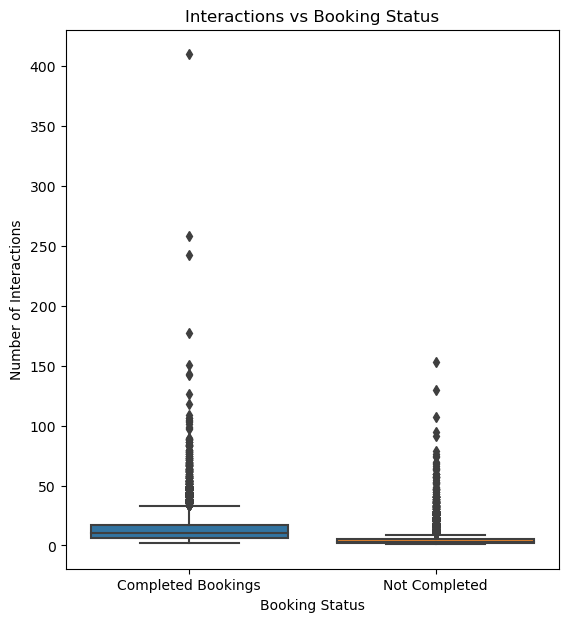

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = airbnb_df.copy()
df_copy['booking_status'] = df_copy['booking_completed'].map({0: 'Not Completed', 1: 'Completed Bookings'})

plt.figure(figsize=(14, 7))

# Box plot for the number of interactions between the host and the guest
plt.subplot(1, 2, 1)
sns.boxplot(x='booking_status', y='m_interactions', data=df_copy)
plt.title('Interactions vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Interactions')

In [202]:
#Interactions vs Booking Status
#Median: Completed bookings have a higher median number of interactions.
#Variability: Completed bookings show greater variability in interactions.
#Outliers: More outliers with high interactions for completed bookings.

In [199]:
# the first box plot indicates that more interactions likely lead to higher booking completion

In [178]:
#Following up I will look into the data summary statistics

In [179]:
airbnb_df.describe()

,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,total_reviews,booking_completed,host_replied,host_accepted,interaction_occurred
count,25855,16415,11587,27887,27887,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.000000,27887.0
mean,2016-03-25 03:05:00.799497216,2016-03-30 16:20:44.481267200,2016-04-02 17:27:40.525761536,2016-05-31 19:56:50.492344320,2016-06-08 08:36:53.160253952,2.781941,8.255818,193.712626,15.665113,0.415498,0.927135,0.588626,1.0
min,2016-01-01 01:07:50,2016-01-01 12:24:15,2016-01-01 12:24:15,2016-01-01 00:00:00,2016-01-02 00:00:00,0.000000,1.000000,0.000000,-34.000000,0.000000,0.000000,0.000000,1.0
25%,2016-01-29 19:49:19,2016-02-08 19:14:27,2016-02-14 12:37:13.500000,2016-03-11 00:00:00,2016-03-18 00:00:00,2.000000,3.000000,66.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,2016-03-21 20:45:42,2016-03-30 12:16:14,2016-04-03 17:18:48,2016-06-11 00:00:00,2016-06-20 00:00:00,2.000000,5.000000,154.000000,3.000000,0.000000,1.000000,1.000000,1.0
75%,2016-05-15 13:53:14.500000,2016-05-19 12:44:38,2016-05-21 16:41:14,2016-08-08 00:00:00,2016-08-16 00:00:00,4.000000,10.000000,269.000000,18.000000,1.000000,1.000000,1.000000,1.0
max,2017-02-23 08:56:59,2016-11-22 11:11:12,2016-09-21 21:55:48,2018-05-01 00:00:00,2018-05-04 00:00:00,16.000000,410.000000,2341.000000,268.000000,1.000000,1.000000,1.000000,1.0
std,NaN,NaN,NaN,NaN,NaN,1.863838,10.035784,183.172132,27.752117,0.492817,0.259920,0.492092,0.0


In [180]:
# What this tells me is that the mean for booking_completed is at 42%, host replying is at 92% and host accepting is at 58%. 
# I can also see that the lenght of the first message sent by a guest on average containts 193 characters
# I can also see that on average the total messages sent by both the guest and the host is 8.2
# I can see that on average guests number is 2.7

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# Next I will plot a correlations heatmap to investigate the correlations between the numerical values 

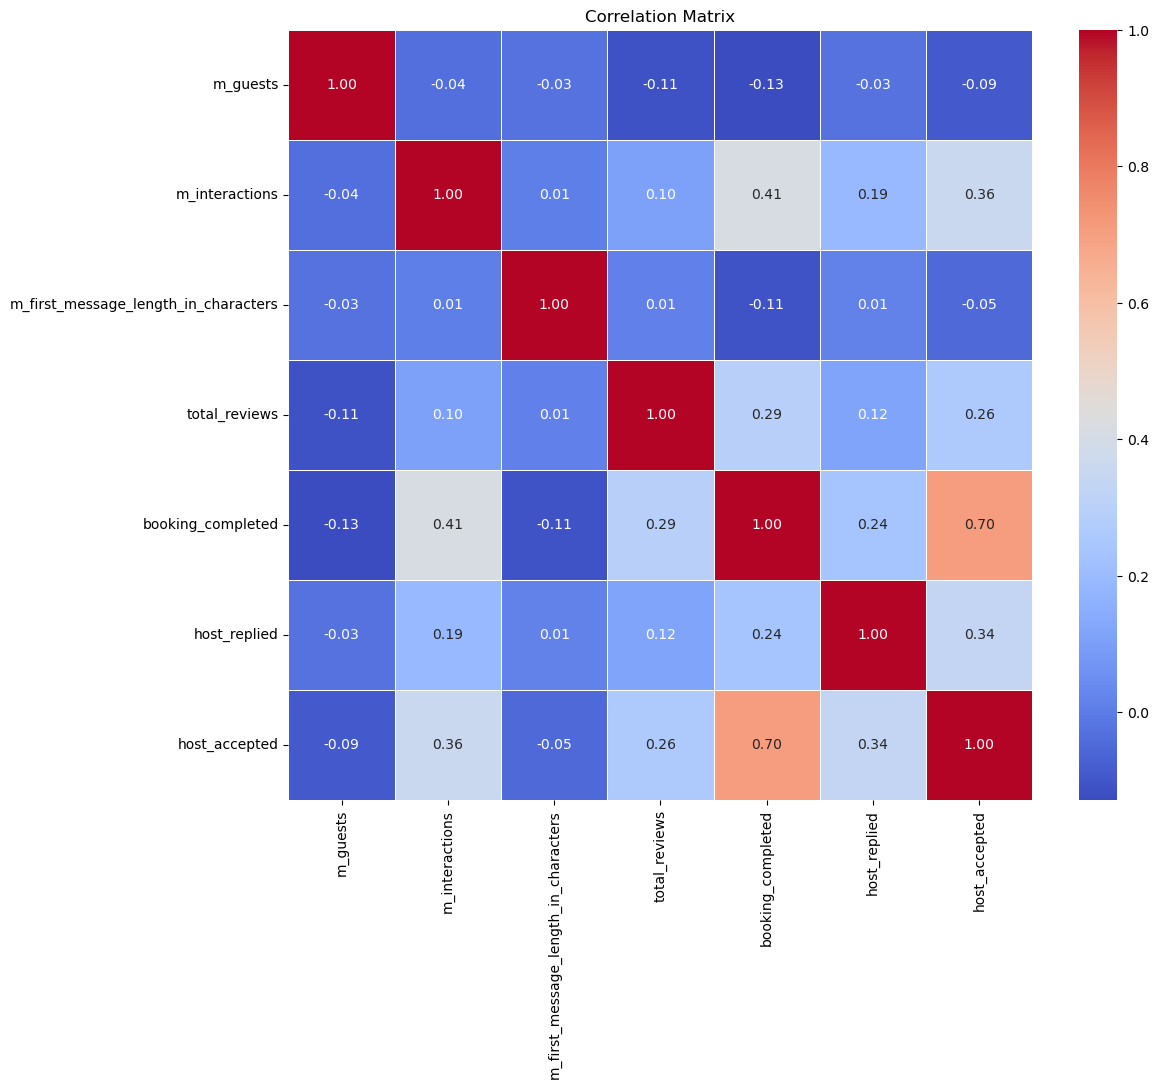

In [183]:
columns_to_include = ["m_guests", "m_interactions", "m_first_message_length_in_characters",
                       "total_reviews", "booking_completed", "host_replied", "host_accepted"]
correlation_matrix = airbnb_df[columns_to_include].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()